
# **Data** **Analysis** 
-extract ,explore and understand financial data regarding the stock market through the IEX cloud API.
- Data cleaning and understanding relationships of the data’s features
-Date Discretization
-Detecting Outliers
-Variable Normalization
-Create a dashboard to visualize some data

In [ ]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

## Data extraction

In [ ]:
stocks=['NFLX','SCHW','CERN','CNP','CDAY','FB','ADI','BKR','CVX','DVN']
api_key='pk_4532c216d60b4f76a8a7e37573cc37c9'
url_batch = f'https://cloud.iexapis.com/stable/stock/market/batch?symbols={stocks}&types=chart&range=Q42019&token={api_key}'
batch = requests.get(url_batch).json()

In [ ]:
type(batch)

dict

In [ ]:
len(batch)

10

In [ ]:
batch.keys()

dict_keys(['NFLX', 'SCHW', 'CERN', 'CNP', 'CDAY', 'FB', 'ADI', 'BKR', 'CVX', 'DVN'])

In [ ]:
type(batch['SCHW']),batch['SCHW'].keys()

(dict, dict_keys(['chart']))

In [ ]:
type(batch['FB']['chart']),len(batch['FB']['chart'])

(list, 64)

In [ ]:
type(batch['DVN']['chart'][0]),batch['DVN']['chart'][0].keys()

(dict,
 dict_keys(['close', 'high', 'low', 'open', 'symbol', 'volume', 'id', 'key', 'subkey', 'date', 'updated', 'changeOverTime', 'marketChangeOverTime', 'uOpen', 'uClose', 'uHigh', 'uLow', 'uVolume', 'fOpen', 'fClose', 'fHigh', 'fLow', 'fVolume', 'label', 'change', 'changePercent']))

In [ ]:
batch

{'NFLX': {'chart': [{'close': 269.58,
    'high': 272.2,
    'low': 264.03,
    'open': 267.35,
    'symbol': 'NFLX',
    'volume': 8786284,
    'id': 'HISTORICAL_PRICES',
    'key': 'NFLX',
    'subkey': '',
    'date': '2019-10-01',
    'updated': 1606830572000,
    'changeOverTime': 0,
    'marketChangeOverTime': 0,
    'uOpen': 267.35,
    'uClose': 269.58,
    'uHigh': 272.2,
    'uLow': 264.03,
    'uVolume': 8786284,
    'fOpen': 267.35,
    'fClose': 269.58,
    'fHigh': 272.2,
    'fLow': 264.03,
    'fVolume': 8786284,
    'label': 'Oct 1, 19',
    'change': 0,
    'changePercent': 0},
   {'close': 268.03,
    'high': 269.35,
    'low': 262.19,
    'open': 263.61,
    'symbol': 'NFLX',
    'volume': 7773299,
    'id': 'HISTORICAL_PRICES',
    'key': 'NFLX',
    'subkey': '',
    'date': '2019-10-02',
    'updated': 1606830572000,
    'changeOverTime': -0.005749684694710332,
    'marketChangeOverTime': -0.005749684694710332,
    'uOpen': 263.61,
    'uClose': 268.03,
    'uHig

In [ ]:
dict_df = {'symbol':[],'open':[],'close':[],'date':[],'high':[],'low':[],'volume':[],'changePercent':[],'date':[]}

In [ ]:
for symbol in batch.keys():
    for row in batch[symbol]['chart']:
        dict_df['symbol'].append(row['symbol'])
        dict_df['open'].append(row['open'])
        dict_df['close'].append(row['close'])
        dict_df['high'].append(row['high'])
        dict_df['low'].append(row['low'])
        dict_df['volume'].append(row['volume'])
        dict_df['changePercent'].append(row['changePercent'])
        dict_df['date'].append(row['date'])

In [ ]:
dict_df

{'symbol': ['NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'NFLX',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',
  'SCHW',


In [ ]:
# create dataframe
df_batch = pd.DataFrame(dict_df)

In [ ]:
stocks=['NFLX','SCHW','CERN','CNP','CDAY','FB','ADI','BKR','CVX','DVN']
url_company = f'https://cloud.iexapis.com/stable/stock/market/batch?symbols={stocks}&types=company&token={api_key}'
company_info = requests.get(url_company).json()

In [ ]:
info = {'companyName':[],'sector':[],'symbol':[]}

In [ ]:
for symbol in company_info.keys():
    info['companyName'].append(company_info[symbol]['company']['companyName'])
    info['sector'].append(company_info[symbol]['company']['sector'])
    info['symbol'].append(company_info[symbol]['company']['symbol'])

In [ ]:
df_comp = pd.DataFrame(info)

In [ ]:
df = pd.merge(df_batch,df_comp,on='symbol')

### First and last 5 rows and general info about the dataframe

In [ ]:
#Show the first 
df.head()

,symbol,open,close,date,high,low,volume,changePercent,companyName,sector
0,NFLX,267.35,269.58,2019-10-01,272.2000,264.03,8786284,0.0000,NetFlix Inc,Information
1,NFLX,263.61,268.03,2019-10-02,269.3500,262.19,7773299,-0.0057,NetFlix Inc,Information
2,NFLX,267.78,268.15,2019-10-03,268.8430,257.01,9068810,0.0004,NetFlix Inc,Information
3,NFLX,268.20,272.79,2019-10-04,275.4846,266.47,9992774,0.0173,NetFlix Inc,Information
4,NFLX,271.99,274.46,2019-10-07,276.6800,271.28,6796811,0.0061,NetFlix Inc,Information


In [ ]:
#show last 5 rows of the dataframe
df.tail()

,symbol,open,close,date,high,low,volume,changePercent,companyName,sector
635,DVN,26.35,26.54,2019-12-24,26.6850,26.280,2779996,0.0118,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction"
636,DVN,26.70,26.36,2019-12-26,26.9100,26.320,3175581,-0.0068,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction"
637,DVN,26.50,25.73,2019-12-27,26.5650,25.710,3950917,-0.0239,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction"
638,DVN,25.76,25.53,2019-12-30,25.9701,25.495,3549698,-0.0078,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction"
639,DVN,25.28,25.97,2019-12-31,26.0800,25.150,3392020,0.0172,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction"


In [ ]:
#show general information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   symbol         640 non-null    object 
 1   open           640 non-null    float64
 2   close          640 non-null    float64
 3   date           640 non-null    object 
 4   high           640 non-null    float64
 5   low            640 non-null    float64
 6   volume         640 non-null    int64  
 7   changePercent  640 non-null    float64
 8   companyName    640 non-null    object 
 9   sector         640 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 55.0+ KB


In [ ]:
df.describe()

,open,close,high,low,volume,changePercent
count,640.000000,640.000000,640.000000,640.000000,6.400000e+02,640.000000
mean,96.060758,96.157719,97.107004,95.047752,5.937770e+06,0.002081
std,84.515196,84.693058,85.544500,83.545758,5.417090e+06,0.017320
min,19.780000,19.800000,20.390000,19.720000,2.516400e+05,-0.071400
25%,27.855000,27.592500,28.137500,27.366250,2.314098e+06,-0.006050
50%,66.450000,66.450000,66.975000,65.730000,4.681512e+06,0.001400
75%,118.830000,118.640000,119.462500,117.870000,7.519484e+06,0.011800
max,337.760000,336.900000,338.000000,332.010000,4.283438e+07,0.102100


## Data cleaning

In [ ]:
#open , close , high , low  should be rounded to 2 decimal places the change percent feature should be presented as a percentage and rounded to 2 decimal places as well.

df['changePercent']=df['changePercent']*100
df.round(decimals=2)

,symbol,open,close,date,high,low,volume,changePercent,companyName,sector
0,NFLX,267.35,269.58,2019-10-01,272.20,264.03,8786284,0.00,NetFlix Inc,Information
1,NFLX,263.61,268.03,2019-10-02,269.35,262.19,7773299,-0.57,NetFlix Inc,Information
2,NFLX,267.78,268.15,2019-10-03,268.84,257.01,9068810,0.04,NetFlix Inc,Information
3,NFLX,268.20,272.79,2019-10-04,275.48,266.47,9992774,1.73,NetFlix Inc,Information
4,NFLX,271.99,274.46,2019-10-07,276.68,271.28,6796811,0.61,NetFlix Inc,Information
...,...,...,...,...,...,...,...,...,...,...
635,DVN,26.35,26.54,2019-12-24,26.68,26.28,2779996,1.18,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction"
636,DVN,26.70,26.36,2019-12-26,26.91,26.32,3175581,-0.68,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction"
637,DVN,26.50,25.73,2019-12-27,26.56,25.71,3950917,-2.39,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction"
638,DVN,25.76,25.53,2019-12-30,25.97,25.50,3549698,-0.78,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction"


## Correlation co-efficent

In [ ]:
list1=[]
for i in range(len(stocks)):
    l = stocks[i]. upper()
    list1.append(l)
list1
for stock in list1:
    df_stock= df[df['symbol']==stock]
    print (stock)
    correlation = df_stock['close'].corr(df_stock['open'])
    print ( 'close with open:')
    print (  correlation )
    correlation = df_stock['close'].corr(df_stock['high'])
    print ( 'close with high:')
    print (  correlation )
    correlation = df_stock['close'].corr(df_stock['low'])
    print ( 'close with low:')
    print (  correlation )
    correlation = df_stock['close'].corr(df_stock['volume'])
    print ( 'close with volume:')
    print (  correlation )
    correlation = df_stock['close'].corr(df_stock['changePercent'])
    print ( 'close with changePercent:')
    print (  correlation )

NFLX
close with open:
0.9696262374167862
close with high:
0.9868444559710265
close with low:
0.9886357906132565
close with volume:
-0.21120145424319986
close with changePercent:
0.13849991594533617
SCHW
close with open:
0.9913089397842384
close with high:
0.9950619891915449
close with low:
0.9968531029808977
close with volume:
-0.004361682692911675
close with changePercent:
0.010951012688472676
CERN
close with open:
0.970449729129519
close with high:
0.9883040692560529
close with low:
0.9852346714804701
close with volume:
-0.2290984016561878
close with changePercent:
0.1999701601688698
CNP
close with open:
0.978354853130463
close with high:
0.9852911110633359
close with low:
0.9932294723516893
close with volume:
-0.2255587787534273
close with changePercent:
0.04319248622915718
CDAY
close with open:
0.9927038989055882
close with high:
0.9968739192756666
close with low:
0.9970205289651479
close with volume:
-0.1957945668110935
close with changePercent:
0.15334866810371633
FB
close with o

### Findings and conclusions 
In all stocks close with volume has negative value of correlation,which means these two variables they consistently move in opposite directions to one another. <br> 
In all stocks the close with the open, close with high , close with low  they have strong correlation(perfect positive correlation) almost one  because logically as the close price or the open price increases the (high) highest price to reach will also increases and the (low) lowest price increases.  <br> 
In all stocks the close with changePercent has small value of correlation which means that these two variables are said to have no linear relationship (or a very weak linear relationship) as the changePercent is the difference between the current price and the last trade of the previous day which doesn't affect the close price.<br> 

## Variable transformation

In [ ]:
#in the standard date format
df['date'] = pd.to_datetime(df['date'])

In [ ]:
## obtaining k-1 labels for companyName

tmp_companyName=pd.get_dummies(df['companyName'], drop_first=True)

# Retrieve 1st 5 rows
tmp_companyName.head()

,Baker Hughes Co,Centerpoint Energy Inc.,Ceridian HCM Holding Inc.,Cerner Corp.,Charles Schwab Corp.,Chevron Corp.,Devon Energy Corp.,Meta Platforms Inc,NetFlix Inc
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1


In [ ]:
## obtaining k-1 labels for sector

tmp_sector=pd.get_dummies(df['sector'], drop_first=True)

# Retrieve 1st 5 rows
tmp_sector.head()


,Information,Manufacturing,"Mining, Quarrying, and Oil and Gas Extraction","Professional, Scientific, and Technical Services",Utilities
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [ ]:
##concatinate to the original dataframe
#pdList=[df,c1,c2]
##c1=pd.DataFrame(tmp_companyName)
#c2=pd.DataFrame(tmp_sector)
#newdf=pd.concat(pdList,axis=1,join='inner')
#newdf.head()
pdList = [df,tmp_companyName,tmp_sector]

df = pd.concat(pdList, axis=1, join='inner')
df.head()

,symbol,open,close,date,high,low,volume,changePercent,companyName,sector,...,Charles Schwab Corp.,Chevron Corp.,Devon Energy Corp.,Meta Platforms Inc,NetFlix Inc,Information,Manufacturing,"Mining, Quarrying, and Oil and Gas Extraction","Professional, Scientific, and Technical Services",Utilities
0,NFLX,267.35,269.58,2019-10-01,272.2000,264.03,8786284,0.00,NetFlix Inc,Information,...,0,0,0,0,1,1,0,0,0,0
1,NFLX,263.61,268.03,2019-10-02,269.3500,262.19,7773299,-0.57,NetFlix Inc,Information,...,0,0,0,0,1,1,0,0,0,0
2,NFLX,267.78,268.15,2019-10-03,268.8430,257.01,9068810,0.04,NetFlix Inc,Information,...,0,0,0,0,1,1,0,0,0,0
3,NFLX,268.20,272.79,2019-10-04,275.4846,266.47,9992774,1.73,NetFlix Inc,Information,...,0,0,0,0,1,1,0,0,0,0
4,NFLX,271.99,274.46,2019-10-07,276.6800,271.28,6796811,0.61,NetFlix Inc,Information,...,0,0,0,0,1,1,0,0,0,0


### Findings and conclusions - 
As the companyName , sector , symbol are the only categorical variables ,the  companyName  and the sector are to be transformed to numerical variables only because and the companyName and the sector have the same meaning  , so doing the variable transformation for both the companyName and the symbol is not logic and will increase in the columns of the dateset where we can't increase the size to add morethan 20 coloumns (restriction).

## Date Discretization

In [ ]:
n=df['date'].unique()
n


array(['2019-10-01T00:00:00.000000000', '2019-10-02T00:00:00.000000000',
       '2019-10-03T00:00:00.000000000', '2019-10-04T00:00:00.000000000',
       '2019-10-07T00:00:00.000000000', '2019-10-08T00:00:00.000000000',
       '2019-10-09T00:00:00.000000000', '2019-10-10T00:00:00.000000000',
       '2019-10-11T00:00:00.000000000', '2019-10-14T00:00:00.000000000',
       '2019-10-15T00:00:00.000000000', '2019-10-16T00:00:00.000000000',
       '2019-10-17T00:00:00.000000000', '2019-10-18T00:00:00.000000000',
       '2019-10-21T00:00:00.000000000', '2019-10-22T00:00:00.000000000',
       '2019-10-23T00:00:00.000000000', '2019-10-24T00:00:00.000000000',
       '2019-10-25T00:00:00.000000000', '2019-10-28T00:00:00.000000000',
       '2019-10-29T00:00:00.000000000', '2019-10-30T00:00:00.000000000',
       '2019-10-31T00:00:00.000000000', '2019-11-01T00:00:00.000000000',
       '2019-11-04T00:00:00.000000000', '2019-11-05T00:00:00.000000000',
       '2019-11-06T00:00:00.000000000', '2019-11-07

In [ ]:
#dates=df['date']
#dates.append("2020-06-31")
#date=dates[0:64]
#print(date)
#week=[]
i1= ['2019-10-01T00:00:00.000000000', '2019-10-10T00:00:00.000000000', '2019-10-21T00:00:00.000000000', '2019-10-30T00:00:00.000000000','2019-11-08T00:00:00.000000000', '2019-11-19T00:00:00.000000000', '2019-11-29T00:00:00.000000000', '2019-12-10T00:00:00.000000000', '2019-12-19T00:00:00.000000000', '2019-12-31T00:00:00.000000000']
i2= ['2019-10-01', '2019-10-10', '2019-10-21', '2019-10-30','2019-11-08', '2019-11-19', '2019-11-29', '2019-12-10', '2019-12-19', '2019-12-31', '2020-01-07']
i3=[]
for i in i2:
    a=np.datetime64(i)
    i3.append(a)
df['week number']= pd.cut(df['date'],
     bins=i3, labels=["week 1", "week 2", "week 3", "week 4", "week 5", "week 6", "week 7", "week 8", "week 9","week 10"], include_lowest=True, right=False)
df['week range']=pd.cut(df['date'],10)
df.tail(20)

,symbol,open,close,date,high,low,volume,changePercent,companyName,sector,...,Devon Energy Corp.,Meta Platforms Inc,NetFlix Inc,Information,Manufacturing,"Mining, Quarrying, and Oil and Gas Extraction","Professional, Scientific, and Technical Services",Utilities,week number,week range
620,DVN,21.50,21.41,2019-12-03,21.7700,21.090,4501014,-1.92,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction",...,1,0,0,0,0,1,0,0,week 7,"(2019-11-24 14:24:00, 2019-12-03 16:48:00]"
621,DVN,21.76,22.39,2019-12-04,22.5900,21.740,6375537,4.58,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction",...,1,0,0,0,0,1,0,0,week 7,"(2019-12-03 16:48:00, 2019-12-12 19:12:00]"
622,DVN,22.67,22.07,2019-12-05,22.7400,21.870,5175046,-1.43,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction",...,1,0,0,0,0,1,0,0,week 7,"(2019-12-03 16:48:00, 2019-12-12 19:12:00]"
623,DVN,22.17,23.14,2019-12-06,23.2500,22.170,5310234,4.85,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction",...,1,0,0,0,0,1,0,0,week 7,"(2019-12-03 16:48:00, 2019-12-12 19:12:00]"
624,DVN,22.91,23.15,2019-12-09,23.3000,22.870,4561286,0.04,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction",...,1,0,0,0,0,1,0,0,week 7,"(2019-12-03 16:48:00, 2019-12-12 19:12:00]"
625,DVN,23.49,23.42,2019-12-10,23.8900,23.165,5089099,1.17,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction",...,1,0,0,0,0,1,0,0,week 8,"(2019-12-03 16:48:00, 2019-12-12 19:12:00]"
626,DVN,23.33,23.42,2019-12-11,23.5800,23.120,3583927,0.00,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction",...,1,0,0,0,0,1,0,0,week 8,"(2019-12-03 16:48:00, 2019-12-12 19:12:00]"
627,DVN,23.39,23.99,2019-12-12,24.1150,23.320,5832992,2.43,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction",...,1,0,0,0,0,1,0,0,week 8,"(2019-12-03 16:48:00, 2019-12-12 19:12:00]"
628,DVN,24.05,23.48,2019-12-13,24.2100,23.430,4573657,-2.13,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction",...,1,0,0,0,0,1,0,0,week 8,"(2019-12-12 19:12:00, 2019-12-21 21:36:00]"
629,DVN,23.78,23.85,2019-12-16,24.2050,23.630,11448524,1.58,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction",...,1,0,0,0,0,1,0,0,week 8,"(2019-12-12 19:12:00, 2019-12-21 21:36:00]"


In [ ]:
df.head(20)

,symbol,open,close,date,high,low,volume,changePercent,companyName,sector,...,Devon Energy Corp.,Meta Platforms Inc,NetFlix Inc,Information,Manufacturing,"Mining, Quarrying, and Oil and Gas Extraction","Professional, Scientific, and Technical Services",Utilities,week number,week range
0,NFLX,267.350,269.58,2019-10-01,272.2000,264.0300,8786284,0.00,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 1,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"
1,NFLX,263.610,268.03,2019-10-02,269.3500,262.1900,7773299,-0.57,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 1,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"
2,NFLX,267.780,268.15,2019-10-03,268.8430,257.0100,9068810,0.04,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 1,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"
3,NFLX,268.200,272.79,2019-10-04,275.4846,266.4700,9992774,1.73,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 1,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"
4,NFLX,271.990,274.46,2019-10-07,276.6800,271.2800,6796811,0.61,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 1,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"
5,NFLX,273.030,270.72,2019-10-08,275.5300,270.6427,6302269,-1.36,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 1,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"
6,NFLX,270.020,267.53,2019-10-09,271.0000,264.5700,6843488,-1.18,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 1,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"
7,NFLX,265.970,280.48,2019-10-10,280.5300,265.0337,10961191,4.84,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 2,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"
8,NFLX,284.800,282.93,2019-10-11,287.8700,275.8947,8817301,0.87,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 2,"(2019-10-10 02:24:00, 2019-10-19 04:48:00]"
9,NFLX,283.930,285.53,2019-10-14,286.9300,282.0000,5543120,0.92,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 2,"(2019-10-10 02:24:00, 2019-10-19 04:48:00]"


In [ ]:
df['week number'].unique()

['week 1', 'week 2', 'week 3', 'week 4', 'week 5', 'week 6', 'week 7', 'week 8', 'week 9', 'week 10']
Categories (10, object): ['week 1' < 'week 2' < 'week 3' < 'week 4' ... 'week 7' < 'week 8' < 'week 9' < 'week 10']

### Findings and conclusions- what is the cardinality of weeks(how many weeks is there)
10 weeks as shown in the cell [33] (df['week number'].unique())  <br>
I added an extra date at the end of 07-01-2020 and added right=false to .cut to not take the inclusive  <br>


## Detecting outliers

NFLX


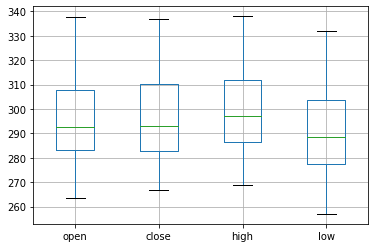

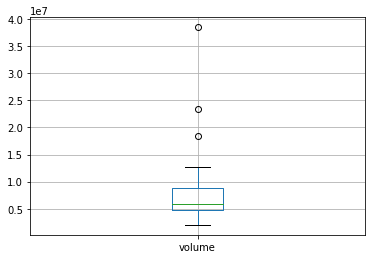

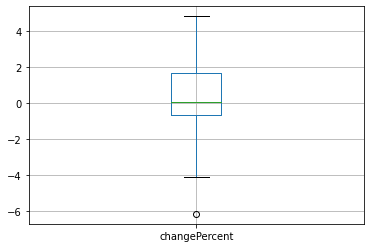

SCHW


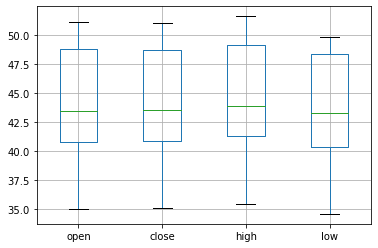

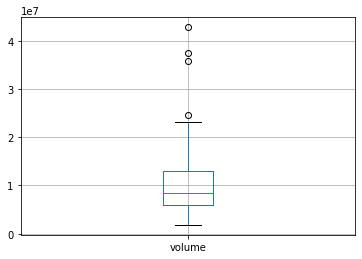

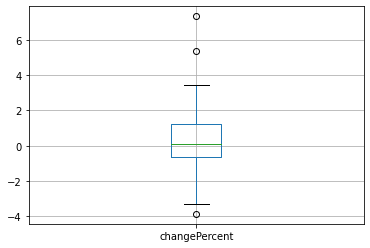

CERN


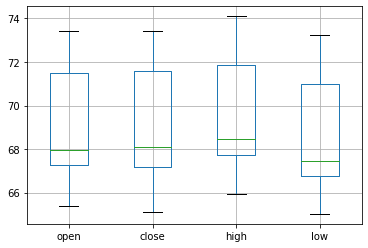

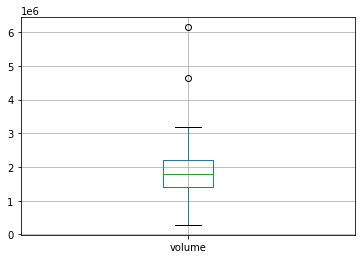

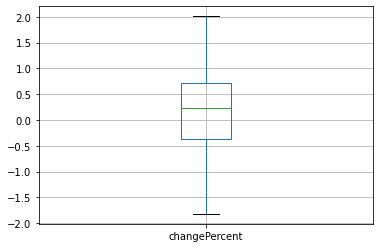

CNP


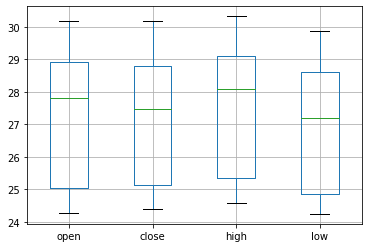

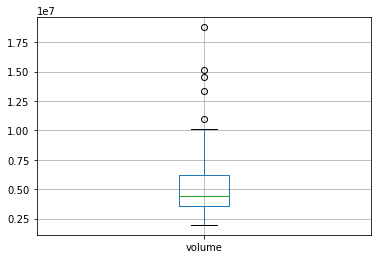

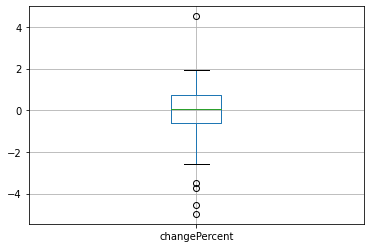

CDAY


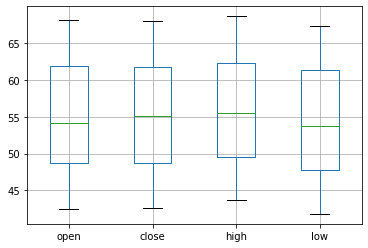

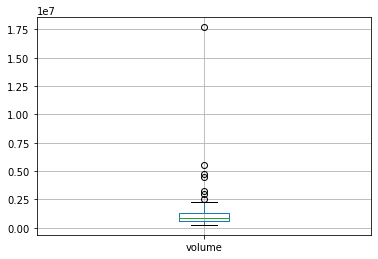

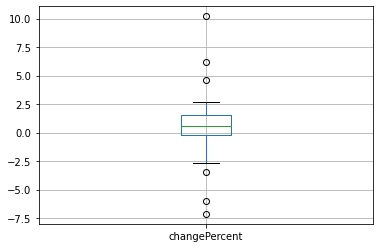

FB


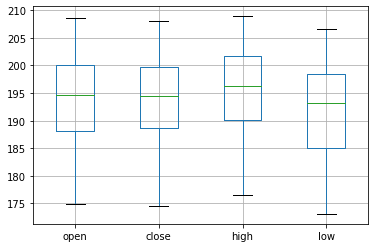

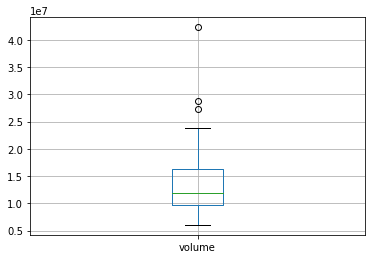

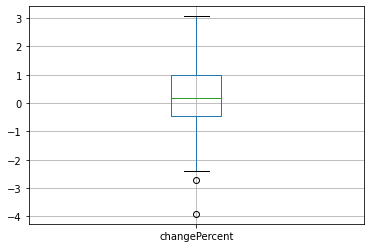

ADI


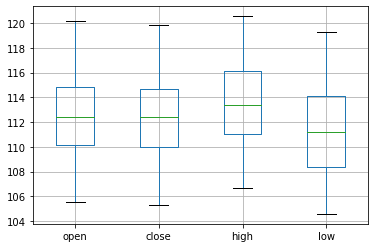

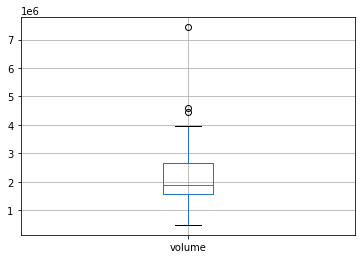

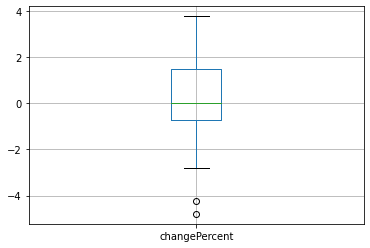

BKR


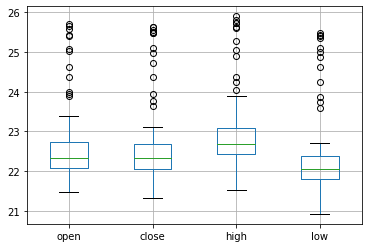

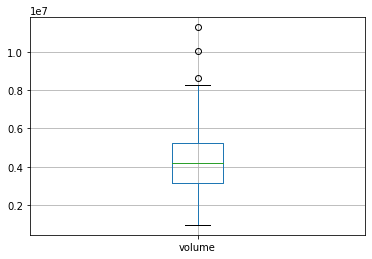

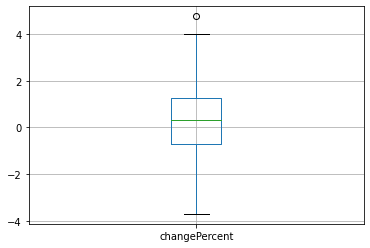

CVX


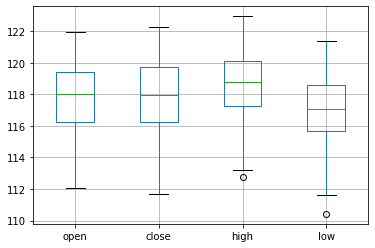

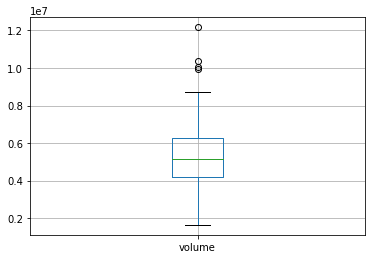

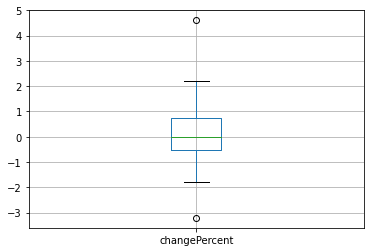

DVN


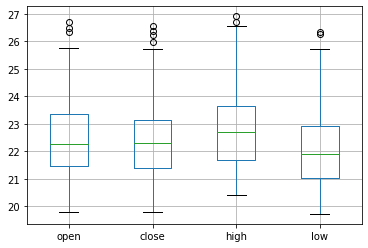

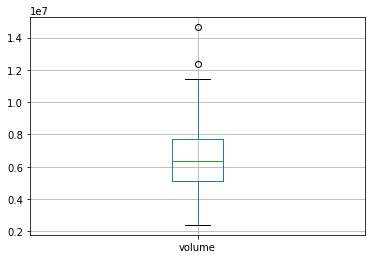

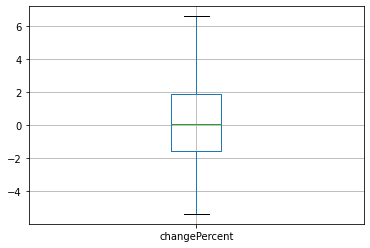

In [ ]:
from matplotlib import figure
list1=[]
for i in range(len(stocks)):
    l = stocks[i]. upper()
    list1.append(l)
list1
for stock in list1:
    df_stock= df[df['symbol']==stock]
    print (stock)
    df_stock[[ 'open', 'close', 'high', 'low']].boxplot()
    plt.show()
    df_stock[['volume']].boxplot()
    plt.show()
    df_stock[['changePercent']].boxplot()
    plt.show()

### Findings and conclusions- 
The volume has outliers in NFLX,SCHW,CERN,CNP,CDAY,FB,ADI,BKR,CVX,DVN (ALL THE STOCKS) <br>
The changePercent has outliers except DVN CERN <br>
The open , close have outliers except NFLX,SCHW,CERN,CNP,CDAY,FB,ADI,CVX <br>
The high , low have outliers except NFLX,SCHW,CERN,CNP,CDAY,FB,ADI <br>

## Variable normalization

In [ ]:
df.head()

,symbol,open,close,date,high,low,volume,changePercent,companyName,sector,...,Devon Energy Corp.,Meta Platforms Inc,NetFlix Inc,Information,Manufacturing,"Mining, Quarrying, and Oil and Gas Extraction","Professional, Scientific, and Technical Services",Utilities,week number,week range
0,NFLX,267.35,269.58,2019-10-01,272.2000,264.03,8786284,0.00,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 1,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"
1,NFLX,263.61,268.03,2019-10-02,269.3500,262.19,7773299,-0.57,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 1,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"
2,NFLX,267.78,268.15,2019-10-03,268.8430,257.01,9068810,0.04,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 1,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"
3,NFLX,268.20,272.79,2019-10-04,275.4846,266.47,9992774,1.73,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 1,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"
4,NFLX,271.99,274.46,2019-10-07,276.6800,271.28,6796811,0.61,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 1,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"


In [ ]:
# set up the scaler
scaler = RobustScaler()

# fit the scaler df[['volume']] it will learn the parameters
scaler.fit(df[['volume']])

# transform df[['volume']]
df[['volume']]= scaler.transform(df[['volume']])

# the scaler stores the median values of the features as learned from df
scaler.center_
# the scaler stores the IQR values of the features as learned from df
scaler.scale_


df[['volume']] = pd.DataFrame(df[['volume']], columns=df[['volume']].columns)



In [ ]:
df.head()

,symbol,open,close,date,high,low,volume,changePercent,companyName,sector,...,Devon Energy Corp.,Meta Platforms Inc,NetFlix Inc,Information,Manufacturing,"Mining, Quarrying, and Oil and Gas Extraction","Professional, Scientific, and Technical Services",Utilities,week number,week range
0,NFLX,267.35,269.58,2019-10-01,272.2000,264.03,0.788562,0.00,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 1,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"
1,NFLX,263.61,268.03,2019-10-02,269.3500,262.19,0.593959,-0.57,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 1,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"
2,NFLX,267.78,268.15,2019-10-03,268.8430,257.01,0.842838,0.04,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 1,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"
3,NFLX,268.20,272.79,2019-10-04,275.4846,266.47,1.020339,1.73,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 1,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"
4,NFLX,271.99,274.46,2019-10-07,276.6800,271.28,0.406367,0.61,NetFlix Inc,Information,...,0,0,1,1,0,0,0,0,week 1,"(2019-09-30 21:48:57.600000, 2019-10-10 02:24:00]"


### Findings and conclusions - Which feature was normalised and why? Which technique was used and why?
volume feature as the values are so big it has to be normalized <br>
RobustScaling Technique as it is recommended if the data shows outliers and the volume has outliers in all stocks.<br>

## Bonus - Dashboard

### Average closing price per week

In [ ]:
def vis_close(s):
    s.groupby('week number')['close'].mean().plot.bar()

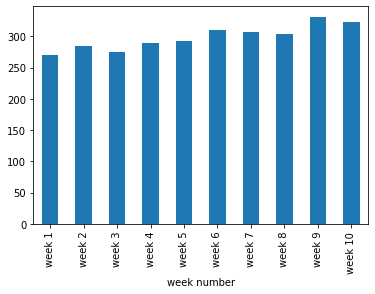

NFLX


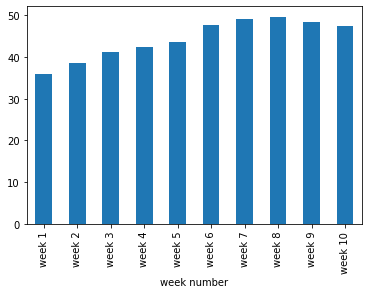

SCHW


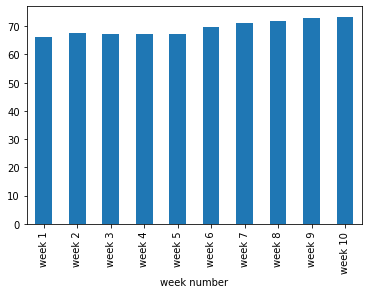

CERN


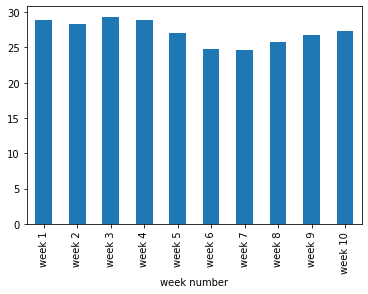

CNP


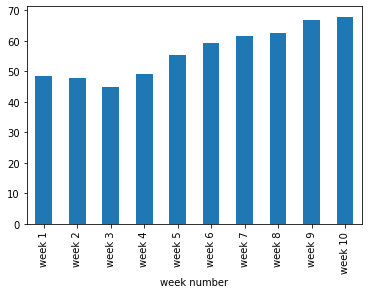

CDAY


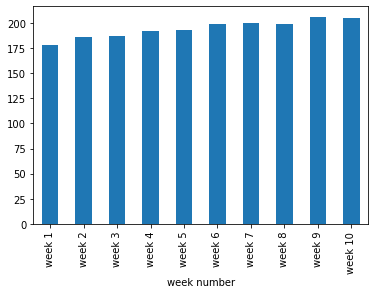

FB


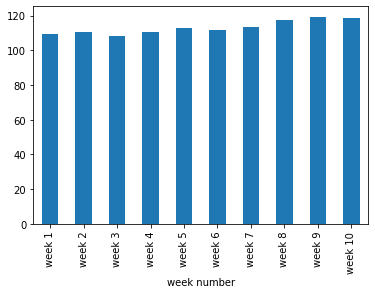

ADI


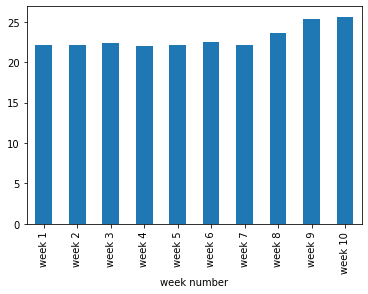

BKR


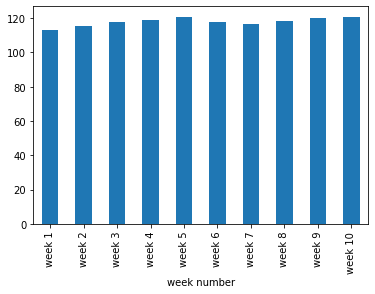

CVX


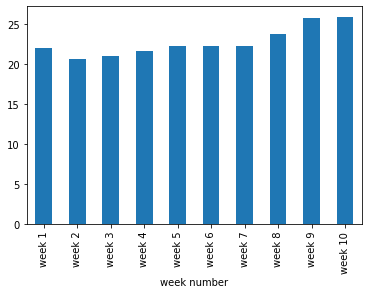

DVN


In [ ]:
list1=[]
for i in range(len(stocks)):
    l = stocks[i]. upper()
    list1.append(l)
list1
for stock in list1:
    df_stock= df[df['symbol']==stock]
    vis_close(df_stock)
    plt.show()
    print(stock)


### Average change per week

In [ ]:
def vis_change(s):
    s.groupby('week number')['changePercent'].mean().plot.bar()

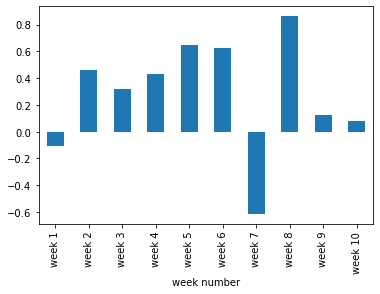

NFLX


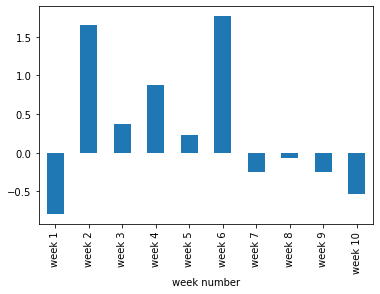

SCHW


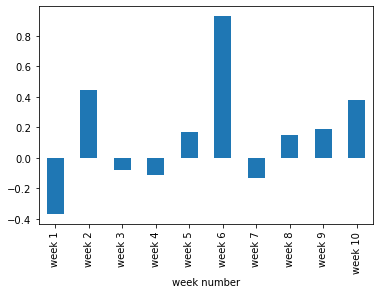

CERN


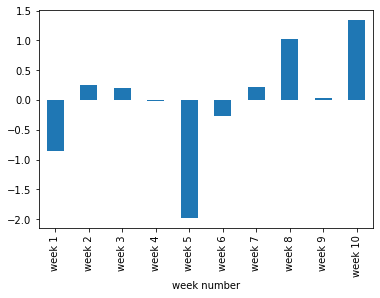

CNP


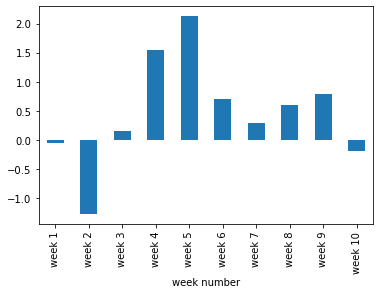

CDAY


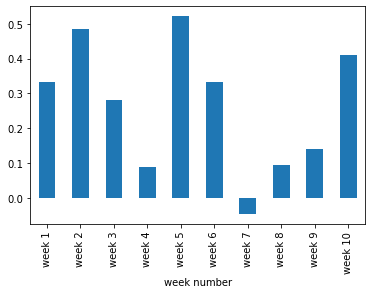

FB


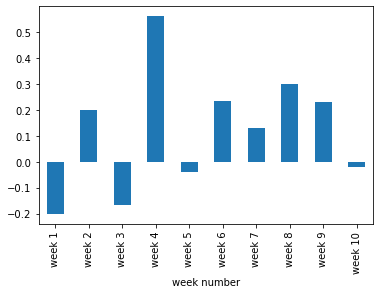

ADI


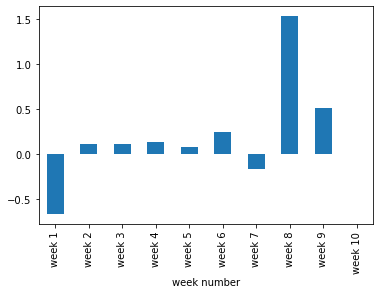

BKR


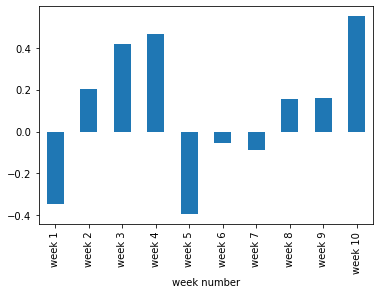

CVX


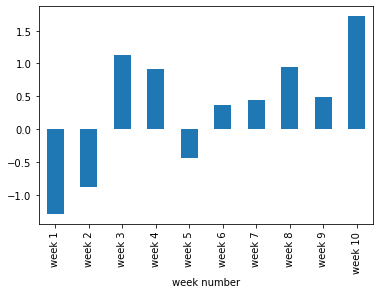

DVN


In [ ]:
list1=[]
for i in range(len(stocks)):
    l = stocks[i]. upper()
    list1.append(l)
list1
for stock in list1:
    df_stock= df[df['symbol']==stock]
    vis_change(df_stock)
    plt.show()
    print(stock)

### Average volume per week of each stock

In [ ]:
def vis_volume(s):
    s.groupby('week number')['volume'].mean().plot.bar()

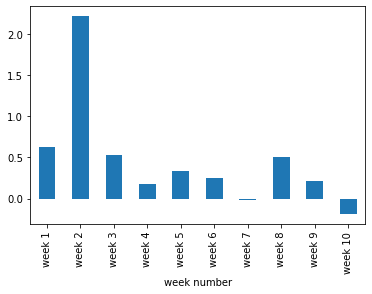

NFLX


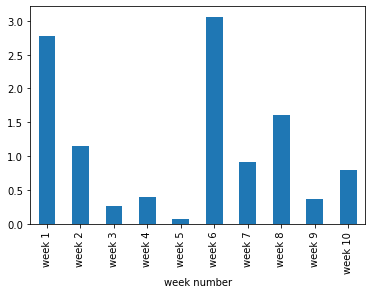

SCHW


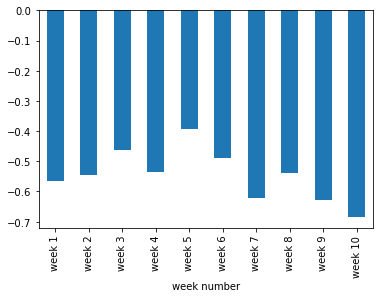

CERN


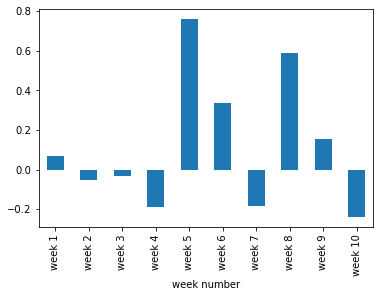

CNP


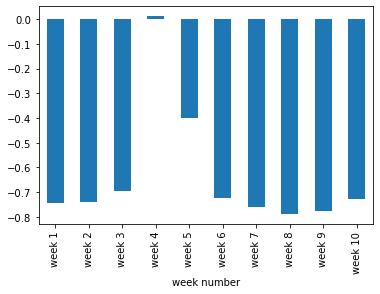

CDAY


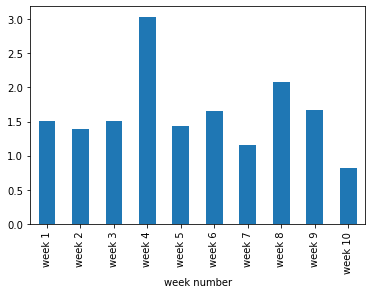

FB


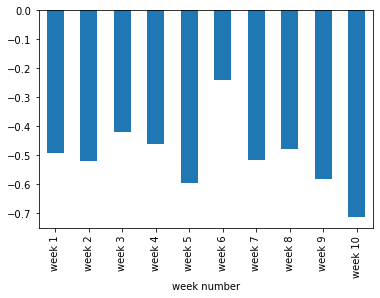

ADI


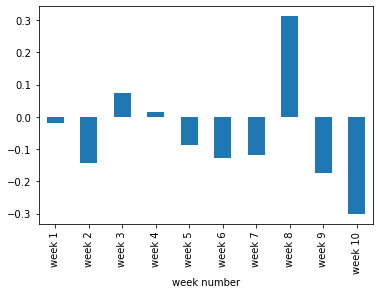

BKR


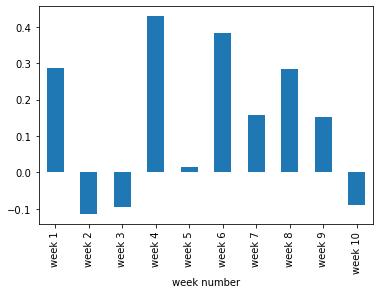

CVX


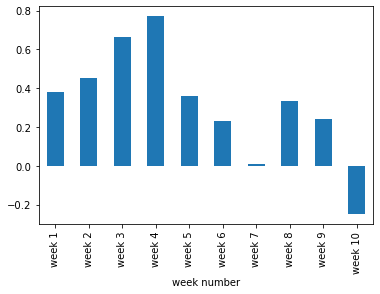

DVN


In [ ]:
list1=[]
for i in range(len(stocks)):
    l = stocks[i]. upper()
    list1.append(l)
list1
for stock in list1:
    df_stock= df[df['symbol']==stock]
    vis_volume(df_stock)
    plt.show()
    print(stock)

### Average closing price of each sector

<AxesSubplot:xlabel='sector'>

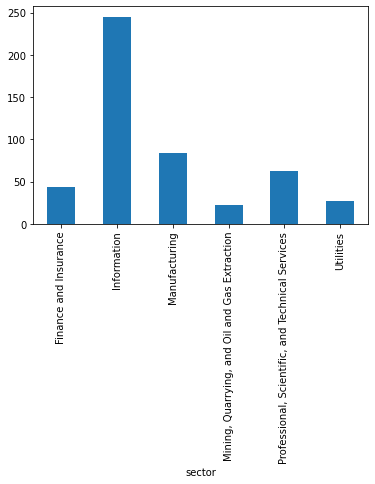

In [ ]:
df.groupby('sector')['close'].mean().plot.bar()